# Early onset of Franciscan subduction



## Imprort Python modules

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import cycle

# Plot figures inline
%matplotlib inline
sns.set(style='ticks', font='Arial', context = 'paper')

## Import and munge the data

In [3]:
# Read the raw data from .csv file
# Francsican mineral ages
frn = pd.read_csv('../data/franciscan-mineral-ages.csv')

# Francsican K-Ar Whole Rock ages
wr = pd.read_csv('../data/franciscan-wr-ages.csv')

# Coast Range Ophiolite
cro = pd.read_csv('../data/cro-ages.csv')

# Map rocktype names for each dataset
FscRockMap = {'bs':'Blueschist', 'gb':'Other', 'mm':'Other', 'amph':'Amphibolite', 'ms':'Other', 
              'eclogite':'Eclogite', 'mv':'Other'}
WrRockMap = {'wr':'whole rock'}
CroRockMap = {'d':'undifferentiated', 'p':'undifferentiated', 'pg':'undifferentiated', 'v':'undifferentiated', 
              'u':'undifferentiated', 'pgs':'plagiogranite', 'glass':'glass'}

frn['Rock'] = frn['Rock'].map(FscRockMap)
wr['Rock'] = wr['Rock'].map(WrRockMap)
cro['Rock'] = cro['Rock'].map(CroRockMap)

# Create a new DataFrames sorted by Age
# Francsican Rocks
fr = frn.sort_values('Age')
fr.index = range(1, len(fr) + 1)
# Coast Range Ophiolite
cr = cro.sort_values('Age')
cr.index = range(1, len(cr) + 1)

# Group data by geochronology method and rock type
# Francsican Rocks
fr_geochron = fr.groupby('Method')
fr_rocktype = fr.groupby('Rock')

# Coast Range Ophiolite
cr_geochron = cr.groupby('Method')
cr_rocktype = cr.groupby('Rock')

facies = frn

## Ranked plot of Franciscan mineral ages

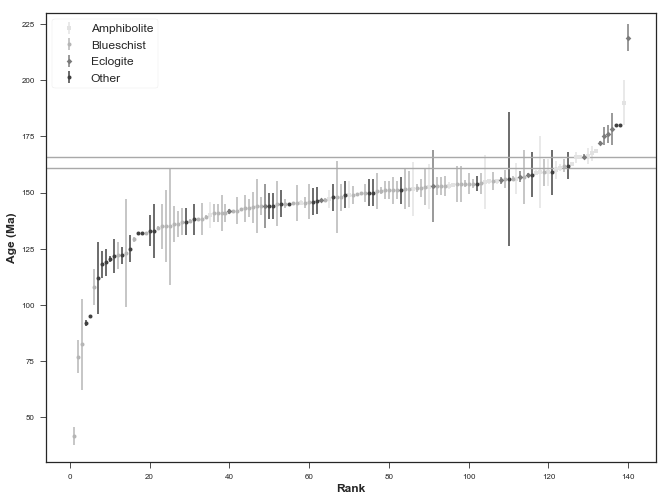

In [4]:
sns.set_palette('Greys', n_colors=4)

# Set figure size
fig = plt.figure(figsize=(2*4.69, 2*4.69/1.33))

# Add 5% padding to the autoscaling
plt.margins(0.05) 
markers = ['s', 'o', 'D', 'o']

# Plot and color by group
for (name, group), marker in zip(fr_rocktype, cycle(markers)):
    plt.errorbar(group.index, group.Age, yerr=group.Error, elinewidth=1.5, marker=marker, linestyle='', 
                 ms=4, label=name)

# Plot labels, legend, and axis limits
#plt.xlim(-2, 140)
plt.ylim(30, 230)
plt.xlabel('Rank', fontweight = 'extra bold',fontsize=12)    
plt.ylabel('Age (Ma)', fontweight = 'extra bold',fontsize=12)    
plt.legend(frameon=True,fancybox=True, loc=2, prop={'size':12})

# Add the age of the CRO
plt.axhline(166, linestyle='-', color='darkgrey')
plt.axhline(161, linestyle='-', color='darkgrey')

# Save the figure
fig.tight_layout()
plt.savefig('../figs/supplement-franciscan-mineral-ages.png')

## Ranked plot of Franciscan mineral and whole rock ages

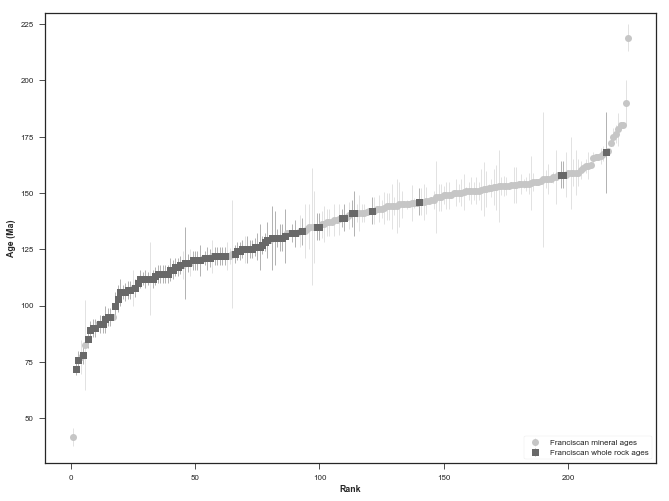

In [5]:
# Set plotting style with Seaborn
sns.set_palette('Greys', n_colors=2)

# Format the data
fr_min = frn
fr_min.Rock = 'Franciscan mineral ages'
wr.Rock = 'Franciscan whole rock ages'
frwr = fr_min.append(wr)
frwr = frwr.sort_values('Age')
frwr.index = range(1, len(frwr) + 1)
frwr_allrocks = frwr.groupby('Rock')

# Definge figure size 
fig = plt.figure(figsize=(2*4.69, 2*4.69/1.33)); 

# Add 5% padding to the autoscaling
plt.margins(0.05) 

# Specify marker styles
markers = ['o', 's']

# Plot and color by group
for (name, group), marker in zip(frwr_allrocks, cycle(markers)):
    plt.errorbar(group.index, group.Age, yerr=group.Error, elinewidth=0.5, marker=marker, linestyle='', 
                 ms=7, label=name)

# Plot labels, legend, and axis limits
plt.ylim(30, 230)
plt.xlabel('Rank', fontweight = 'extra bold')    
plt.ylabel('Age (Ma)', fontweight = 'extra bold')    
plt.legend(frameon=True,fancybox=True, loc=4)

# Save the figure
fig.tight_layout()
plt.savefig('../figs/supplement-franciscan-wr-ages.png')

## Figure 3. Ranked plot of Coast Range Ophiolite ages

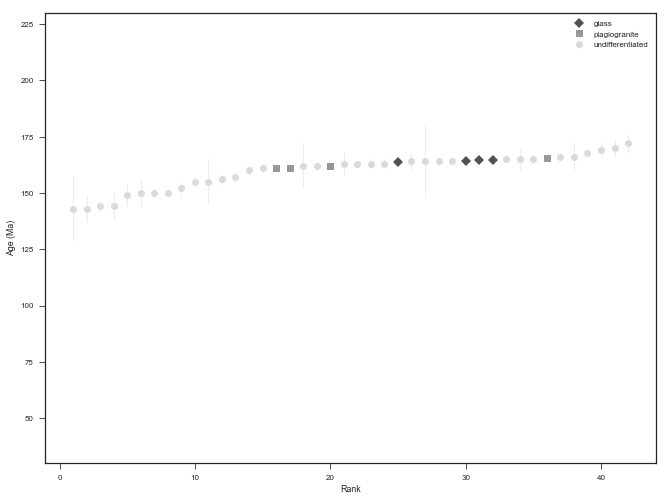

In [7]:
# Set plotting style with Seaborn
sns.set_palette('Greys_r', n_colors=3)


# Definge figure size
fig = plt.figure(figsize=(2*4.69, 2*4.69/1.33)); 

# Add 5% padding to the autoscaling
plt.margins(0.05) 

# Specify markers
markers = ['D', 's', 'o']

# Plot and color by group
for (name, group), marker in zip(cr_rocktype, cycle(markers)):
    plt.errorbar(group.index, group.Age, yerr=group.Error, elinewidth=0.5, marker=marker, linestyle='', 
                 ms=7, label=name)
    
# Plot labels, legend, and axis limits
#plt.xlim(-2, 140)
plt.ylim(30, 230)
plt.xlabel('Rank')    
plt.ylabel('Age (Ma)')    
plt.legend()

# Save the figure
fig.tight_layout()
plt.savefig('../figs/supplement-cro-ages.png')

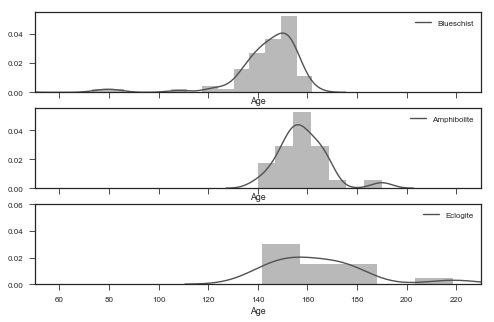

In [31]:
# Set plotting style with Seaborn
sns.set_palette('Greys_r', n_colors=3)

#amph = fr[fr.Rock == 'Amphibolite']
#blue = fr[fr.Rock == 'Blueschist']
#eclo = fr[fr.Rock == 'Eclogite']

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, sharex=True, figsize = (8, 5))

sns.distplot(fr[fr.Rock == 'Blueschist'].Age, ax=ax1, kde_kws={"label": "Blueschist"});
sns.distplot(fr[fr.Rock == 'Amphibolite'].Age, ax=ax2, kde_kws={"label": "Amphibolite"});
sns.distplot(fr[fr.Rock == 'Eclogite'].Age, ax=ax3, kde_kws={"label": "Eclogite"}); 

plt.xlim(50, 230);
plt.ylim(0, 0.06);